# <font color=4197EC>What is Income Inequality?<br>
<font color=49EBF3>Income inequality refers to the unequal distribution of income among individuals or households within a society. It is typically measured by comparing the distribution of income across various segments of a population, often using metrics such as the Gini coefficient or the ratio of income shares held by different groups.

# <strong>Import Essential Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# import sweetviz as sv

# <font color=0984F0> <strong>Load The Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/miss_aq/project2/data.csv")

In [ ]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


# <font color=495FEB><strong> EDA with <font color=49EBB3>Sweetviz</font> Library and Manualy

In [ ]:
print(df.shape)
df.info()

(209499, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wag

In [ ]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [ ]:
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


# <font color=49EBF7> Check The Missing Value

In [ ]:
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [ ]:
# df_report = sv.analyze(df)
# df_report.show_html()


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### <font color=lightblue> We can see that inequality exists in columns according to the Sweetviz report.

In [ ]:
# print(df_report.show_notebook())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df['education'].unique()

array([' High school graduate', ' 12th grade no diploma', ' Children',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 11th grade',
       ' 9th grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' 10th grade', ' Associates degree-academic program',
       ' 1st 2nd 3rd or 4th grade', ' Some college but no degree',
       ' Less than 1st grade', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' Doctorate degree(PhD EdD)'], dtype=object)

In [ ]:
df['education'].value_counts()

 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         829
Name: education, dtype: int64

In [ ]:
df['citizenship'].value_counts()

Native                                          185669
 Foreign born- Not a citizen of U S              14127
 Foreign born- U S citizen by naturalization      6208
 Native- Born abroad of American Parent(s)        1924
 Native- Born in Puerto Rico or U S Outlying      1571
Name: citizenship, dtype: int64

In [ ]:
df['age'].unique()

array([79, 65, 21,  2, 70, 45, 53, 22, 73, 30,  4, 16, 43, 36,  5, 88, 40,
       47, 59, 69, 50, 27, 39, 85, 29, 41, 14, 33, 67, 52, 11,  9, 13, 19,
       26, 23, 37, 58, 63, 46, 62, 28, 31,  3, 18, 78, 15, 38,  7, 35,  1,
       20,  0, 48, 24, 56, 25,  8, 66, 71, 32, 75, 51, 10, 44, 42, 55, 74,
       77, 34, 80, 17, 83, 86, 12, 68, 60, 57, 64, 72, 90, 61, 82,  6, 84,
       49, 76, 54, 89, 81, 87])

In [4]:
Income_Inequality_data = df

<ipython-input-69-2fe6f5329b61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Income_Inequality_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


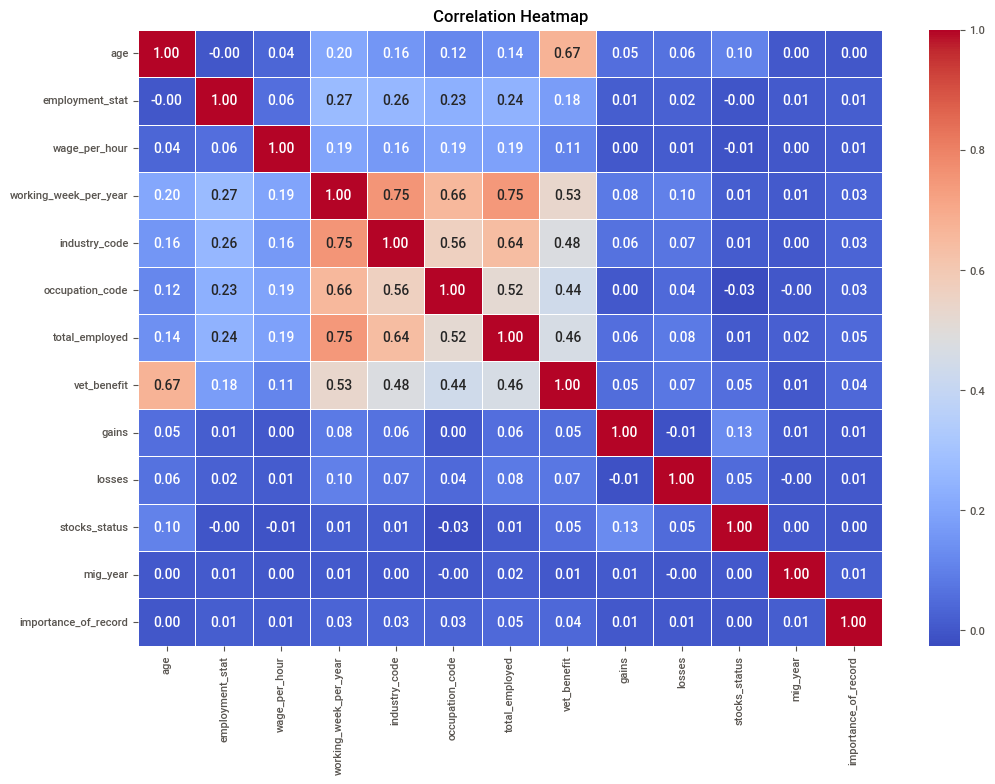

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(Income_Inequality_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# <font color=B6EF1F><strong>Extract Numerical Features From Dataset

In [5]:
numerical_features = Income_Inequality_data.select_dtypes(exclude='object')
for i in numerical_features:
  print(i)



age
employment_stat
wage_per_hour
working_week_per_year
industry_code
occupation_code
total_employed
vet_benefit
gains
losses
stocks_status
mig_year
importance_of_record


In [ ]:
print(numerical_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    209499 non-null  int64  
 1   employment_stat        209499 non-null  int64  
 2   wage_per_hour          209499 non-null  int64  
 3   working_week_per_year  209499 non-null  int64  
 4   industry_code          209499 non-null  int64  
 5   occupation_code        209499 non-null  int64  
 6   total_employed         209499 non-null  int64  
 7   vet_benefit            209499 non-null  int64  
 8   gains                  209499 non-null  int64  
 9   losses                 209499 non-null  int64  
 10  stocks_status          209499 non-null  int64  
 11  mig_year               209499 non-null  int64  
 12  importance_of_record   209499 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 20.8 MB
None


# <font color=lightblue><strong>Check The Missing Value From Numerical Features

In [ ]:
numerical_features.isnull().sum()

age                      0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code            0
occupation_code          0
total_employed           0
vet_benefit              0
gains                    0
losses                   0
stocks_status            0
mig_year                 0
importance_of_record     0
dtype: int64

In [6]:
# function returns the column names having more than 50% missing values
def missing_values(df):
    missing_df=pd.DataFrame(100*Income_Inequality_data.isnull().sum()/df.shape[0],columns=['% Missing'])
    return missing_df[missing_df['% Missing']>0]

In [7]:
missing_values(Income_Inequality_data)

,% Missing
class,50.236517
education_institute,93.650566
unemployment_reason,96.887813
is_labor_union,90.415706
occupation_code_main,50.450837
under_18_family,72.388890
veterans_admin_questionnaire,99.005246
migration_code_change_in_msa,0.757999
migration_prev_sunbelt,42.220727
migration_code_move_within_reg,0.757999


# Delete the columns whose value is more than 50%.

In [8]:
# Dropping columns having missing values greater than 50%
columns_drop=['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state']

In [9]:
Income_Inequality_data = Income_Inequality_data.drop(columns_drop,axis=1)

Income_Inequality_data.shape

(209499, 29)

# Checked Again Dataset

In [ ]:
Income_Inequality_data.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,...,0,0,292,Native,95,US,US,US,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,US,US,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,...,0,0,0,Native,94,US,US,US,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,India,India,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,0,0,0,Native,95,US,US,US,1580.79,Below limit


# <font color=EFA71F><strong>Drop The Column 'ID'

In [10]:
Income_Inequality_data = pd.DataFrame(Income_Inequality_data.drop('ID', axis=1))

In [ ]:
Income_Inequality_data.isnull().sum()

age                        0
gender                     0
education                  0
marital_status             0
race                       0
is_hispanic                0
employment_commitment      0
employment_stat            0
wage_per_hour              0
working_week_per_year      0
industry_code              0
industry_code_main         0
occupation_code            0
total_employed             0
household_stat             0
household_summary          0
vet_benefit                0
tax_status                 0
gains                      0
losses                     0
stocks_status              0
citizenship                0
mig_year                   0
country_of_birth_own       0
country_of_birth_father    0
country_of_birth_mother    0
importance_of_record       0
income_above_limit         0
dtype: int64

# <font color=4197EC><strong>After observing the data set, deleted the irrelevant column.<br>
- 'country_of_birth_own',
- 'country_of_birth_father',
- 'country_of_birth_mother'

In [11]:
Income_Inequality_data = pd.DataFrame(Income_Inequality_data.drop(['country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother'], axis=1))

In [12]:
Income_Inequality_data.shape

(209499, 25)

# <font color=41ECA1><strong>Check The Outlier

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


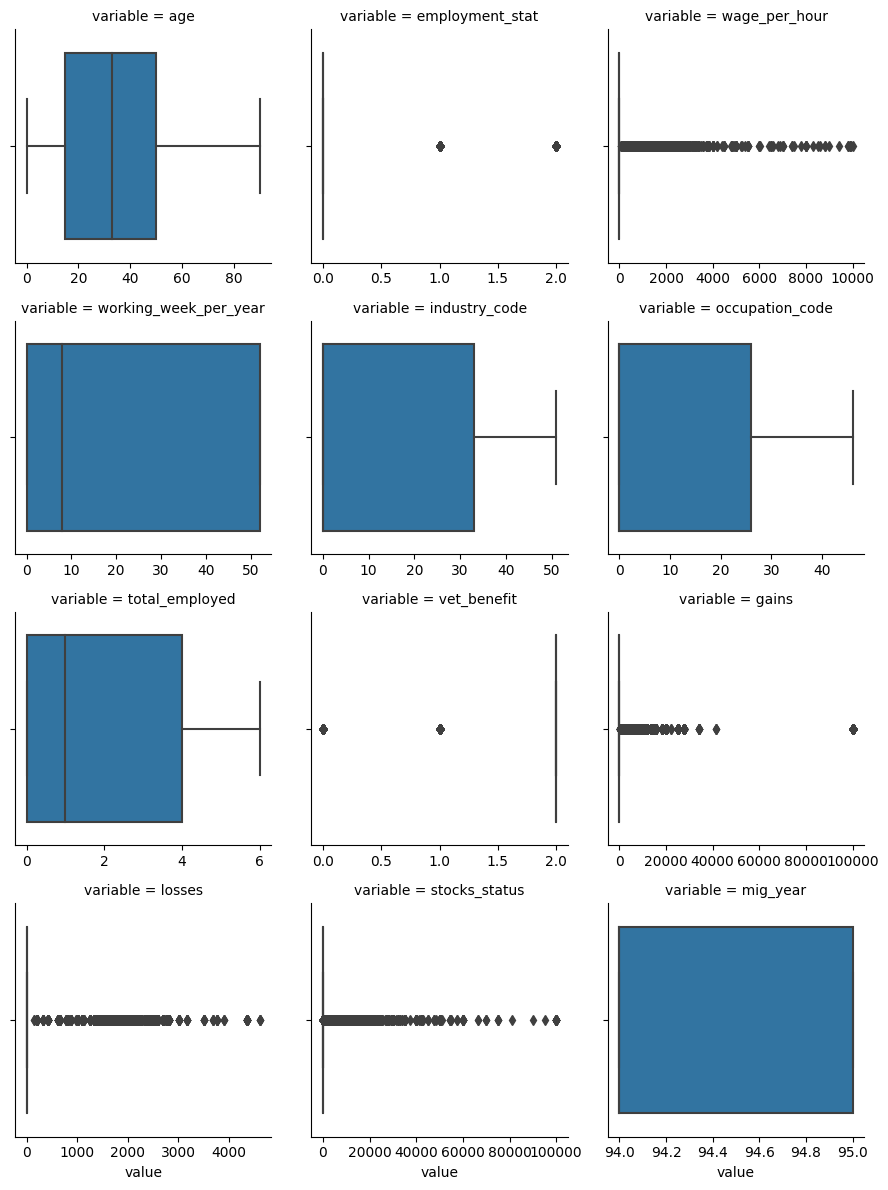

In [ ]:
drawBox = pd.melt(Income_Inequality_data, Income_Inequality_data.describe().columns[-1], Income_Inequality_data.describe().columns[:-1])

box_plot = sns.FacetGrid(drawBox, col="variable", col_wrap=3, sharex=False, sharey=False)
box_plot.map(sns.boxplot, "value")

plt.show()

In [13]:
y = Income_Inequality_data[['income_above_limit']]
X = Income_Inequality_data.drop(columns=['income_above_limit'])

# <font color=41ECA1><strong>Outlier Remove With  Inter Quartile Range (IQR)<br>
I Already Explain [IQR](https://github.com/waqasali143/wildBB_yield/blob/main/README.md)

In [14]:
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
iqr = q3 - q1

print(iqr)

<ipython-input-14-f60962be1169>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = X.quantile(0.25)


age                        35.00
employment_stat             0.00
wage_per_hour               0.00
working_week_per_year      52.00
industry_code              33.00
occupation_code            26.00
total_employed              4.00
vet_benefit                 0.00
gains                       0.00
losses                      0.00
stocks_status               0.00
mig_year                    1.00
importance_of_record     1124.19
dtype: float64


<ipython-input-14-f60962be1169>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = X.quantile(0.75)


In [15]:
Income_Inequality_data.shape

(209499, 25)

In [16]:
after_iqr_data = Income_Inequality_data[~((Income_Inequality_data < (q1 - 1.5 * iqr)) | (Income_Inequality_data> (q3 + 1.5 * iqr))).any(axis=1)]
after_iqr_data.shape

<ipython-input-16-2450fdc65dc5>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after_iqr_data = Income_Inequality_data[~((Income_Inequality_data < (q1 - 1.5 * iqr)) | (Income_Inequality_data> (q3 + 1.5 * iqr))).any(axis=1)]


(100293, 25)

In [17]:
after_iqr_data = after_iqr_data.reset_index().drop(["index"], axis=1)
after_iqr_data.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
0,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,...,Householder,2,Single,0,0,0,Native,94,2366.75,Below limit
1,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1580.79,Below limit
2,53,Male,High school graduate,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,...,Spouse of householder,2,Joint both under 65,0,0,0,Native,95,1401.23,Below limit
3,22,Female,High school graduate,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,...,Spouse of householder,2,Joint both under 65,0,0,0,Native,95,661.07,Below limit
4,73,Female,7th and 8th grade,Married-civilian spouse present,Black,All other,Not in labor force,0,0,1,...,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1267.30,Below limit


In [18]:
Income_Inequality_data_after_iqr = after_iqr_data

# Again We Drop The Column<br>
- 'household_stat'

In [19]:
Income_Inequality_data_after_iqr = Income_Inequality_data_after_iqr.drop(['household_stat'],axis=1)

Income_Inequality_data_after_iqr.shape

(100293, 24)

In [ ]:
Income_Inequality_data_after_iqr.columns

Index(['age', 'gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'industry_code_main',
       'occupation_code', 'total_employed', 'household_summary', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'importance_of_record', 'income_above_limit'],
      dtype='object')

In [21]:
numerical_fetures=df.select_dtypes(exclude=object)
categorical_features=df.select_dtypes(include=object)

## <font color=#7EEF34><strong>Check Imbalanced Data<br>
<font color=#34EFCA><strong> What is imbalance data?<br>
those types of datasets where the target class has an uneven distribution of observations.<br>
- Random oversampling
- Under-sampling
- SMOTE (Synthetic Minority Oversampling Technique)<br>
<font color=#34B6EF>There is also another technique. But typically mostly use <font color=#36DADA>***SMOTE***

In [ ]:
print('The class Imbalance in the data is given below')

print(Income_Inequality_data_after_iqr['income_above_limit'].value_counts(),'\n')
print('-'*50, '\n')

print('The class imbalance in terms of percentage is given below ')

print(f"{df['income_above_limit'].value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
Below limit    96219
Above limit     4074
Name: income_above_limit, dtype: int64 

-------------------------------------------------- 

The class imbalance in terms of percentage is given below 
Below limit    93.795674
Above limit     6.204326
Name: income_above_limit, dtype: float64


### <font color=C17CE6> We can see that there is a big difference in the target value. Now let's look at the bar plot.

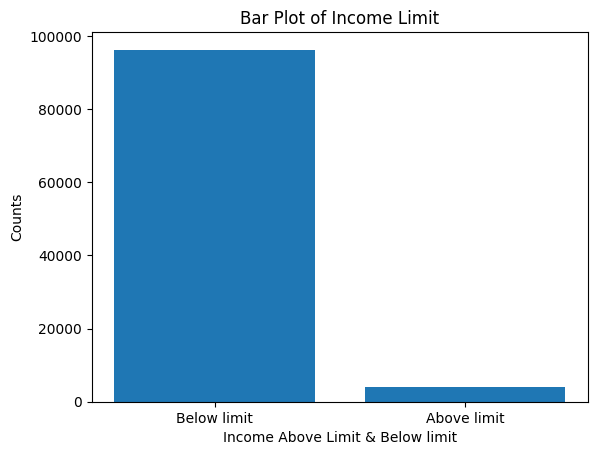

In [ ]:
# put the sum of unique value
income_counts = pd.Series({'Below limit': 96219, 'Above limit': 4074})

plt.bar(income_counts.index, income_counts.values)

# Adding labels and title
plt.xlabel('Income Above Limit & Below limit')
plt.ylabel('Counts')
plt.title('Bar Plot of Income Limit')

# Customizing x-axis ticks to show original categories
plt.xticks(income_counts.index, income_counts.index)

# Show plot
plt.show()


In [ ]:
X=Income_Inequality_data_after_iqr.drop(['income_above_limit'],axis=1)
y=Income_Inequality_data_after_iqr['income_above_limit']

In [ ]:
#creating the column_name index dictionary
cat_col_index={col_name:i for i,col_name in enumerate(X.columns) if col_name in categorical_features.columns}

list(cat_col_index.values())

[1, 2, 3, 4, 5, 6, 11, 14, 16, 20]

# <font color=53F810>Now we will use the SMOTE technique to balance the data.

## <strong>SMOTE Technique (Synthetic Minority Over-sampling Technique)
<font color=Yellowgreen><strong>SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [ ]:
from imblearn.over_sampling import SMOTE,SMOTENC,RandomOverSampler

In [ ]:
oversampling=SMOTENC(categorical_features=list(cat_col_index.values()),random_state=37)

In [ ]:
X_resampled,y_resampled=oversampling.fit_resample(X,y)

In [ ]:
X_resampled.shape


(192438, 24)

In [ ]:
y_resampled.shape

(192438,)

In [ ]:
y_resampled.value_counts()

Below limit    96219
Above limit    96219
Name: income_above_limit, dtype: int64

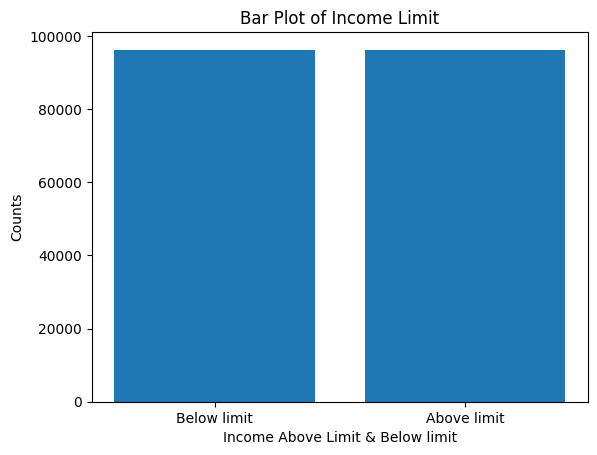

In [ ]:
# put the sum of unique value
income_counts = pd.Series({'Below limit': 96219, 'Above limit': 96219})

plt.bar(income_counts.index, income_counts.values)

# Adding labels and title
plt.xlabel('Income Above Limit & Below limit')
plt.ylabel('Counts')
plt.title('Bar Plot of Income Limit')

# Customizing x-axis ticks to show original categories
plt.xticks(income_counts.index, income_counts.index)

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=91)

In [ ]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit_numeric
0,48,Female,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,20,...,Householder,2,Joint both under 65,0,0,0,Native,95,1748.360000,0
1,45,Female,Bachelors degree(BA AB BS),Married-civilian spouse present,Asian or Pacific Islander,All other,Full-time schedules,0,0,0,...,Spouse of householder,2,Joint both under 65,0,0,0,Foreign born- U S citizen by naturalization,95,838.670000,0
2,43,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,52,...,Householder,2,Joint both under 65,0,0,0,Native,94,3048.890094,1
3,73,Female,7th and 8th grade,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,0,...,Spouse of householder,2,Joint one under 65 & one 65+,0,0,0,Native,94,1367.280000,0
4,16,Male,9th grade,Never married,Amer Indian Aleut or Eskimo,All other,Not in labor force,0,0,2,...,Other relative of householder,2,Nonfiler,0,0,0,Native,95,37.870000,0


In [ ]:
X_test.reset_index(drop=True,inplace=True)
X_test.head(2)

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit_numeric
0,59,Male,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,52,...,Householder,2,Joint both under 65,0,0,0,Native,94,1753.800245,1
1,33,Male,Associates degree-academic program,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,...,Householder,2,Joint both under 65,0,0,0,Native,95,944.364226,1


# <font color=lightgreen><strong>Feature Engineering

In [ ]:
y_train_encoded=y_train.replace({'Below limit':0,'Above limit':1})
y_test_encoded=y_test.replace({'Below limit':0,'Above limit':1})

# Feature Selection on Categorical Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest,chi2,f_classif

## <font color=F7D129><strong>* Label encoding should be used to encode target values,  y, and not the input X.<br>
## <font color=F7D129> <strong> *  Ordinal encoding is used for input X. More details [click here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
# function which applies oridinal encoding to the categorcial columns before performing fetaure selection
def feature_ordinal_encoding(X_train,X_test):
    X_train_cat=X_train.select_dtypes(include=object)
    X_test_cat=X_test.select_dtypes(include=object)
    oe=OrdinalEncoder()

    X_train_oe=oe.fit_transform(X_train_cat)
    X_test_oe=oe.fit_transform(X_test_cat)

    X_train_oe=pd.DataFrame(X_train_oe, columns=X_train_cat.columns)
    X_test_oe =pd.DataFrame(X_test_oe, columns=X_test_cat.columns)
    return X_train_oe,X_test_oe

# function performs feature selection on ordinal encoded categororical columns
def feature_selection(X,y,score_func):
    feat=SelectKBest(score_func=score_func,k=5)

    feat.fit(X,y)

    feature_columns=feat.get_feature_names_out(feat.feature_names_in_)
    return feature_columns

X_train_oe,X_test_oe=feature_ordinal_encoding(X_train,X_test)


## <strong> chi-square test (chi2)
## A chi-square test is a statistical test used to compare observed results with expected results.<br>
<img src= https://useruploads.socratic.org/5IAt2rl2QzelSEz1SvJo_chi-square-equation2.jpg><br>
<br>


In [ ]:
print("Categorical Features selected-Training data:",feature_selection(X_train_oe,y_train_encoded,chi2))
print("Categorical Features selected-Testing data:",feature_selection(X_test_oe,y_test_encoded,chi2))

Categorical Features selected-Training data: ['gender' 'education' 'marital_status' 'is_hispanic' 'tax_status']
Categorical Features selected-Testing data: ['gender' 'education' 'marital_status' 'is_hispanic' 'tax_status']


# Feature Selection on Numerical Features

In [ ]:
X_train_num=X_train.select_dtypes(exclude=object)
X_test_num=X_test.select_dtypes(exclude=object)
print("Numerical Features selected-Training data:",feature_selection(X_train_num,y_train_encoded,f_classif))
print("Numerical Features selected-Testing data:",feature_selection(X_test_num,y_test_encoded,f_classif))

Numerical Features selected-Training data: ['working_week_per_year' 'industry_code' 'total_employed' 'mig_year'
 'income_above_limit_numeric']
Numerical Features selected-Testing data: ['working_week_per_year' 'industry_code' 'total_employed' 'mig_year'
 'income_above_limit_numeric']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 1  2  7  8  9 10 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 1  2  7  8  9 10 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-p

In [ ]:
X_train=X_train[['gender','education', 'marital_status', 'is_hispanic',
                 'tax_status','age', 'working_week_per_year','total_employed','vet_benefit']]
X_test=X_test[['gender','education', 'marital_status', 'is_hispanic',
                 'tax_status','age', 'working_week_per_year','total_employed','vet_benefit']]
print("Training data shape",X_train.shape)
print("Testing data shape",X_test.shape)

Training data shape (134706, 9)
Testing data shape (57732, 9)


# Encoding Features

In [ ]:
numerical_features=X_train.select_dtypes(exclude=object)
numerical_features.columns

Index(['age', 'working_week_per_year', 'total_employed', 'vet_benefit'], dtype='object')

In [ ]:
categorical_features=X_train.select_dtypes(include=object)
categorical_features.columns

Index(['gender', 'education', 'marital_status', 'is_hispanic', 'tax_status'], dtype='object')

## <font color=29F7C8> <strong> One Hot Encoder
<strong>It provides a OneHotEncoder function that we use for encoding categorical and numerical variables into binary vectors, also before implementing this algorithm.<br>
[More](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
cat_columns=['gender', 'education', 'marital_status', 'is_hispanic', 'tax_status']
#OHe encoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_train_encoded=encoder.fit_transform(X_train[cat_columns])

X_train_encoded=pd.DataFrame(X_train_encoded,columns=encoder.get_feature_names_out(cat_columns))
X_train_encoded=pd.concat([X_train[numerical_features.columns],X_train_encoded],axis=1)
X_train_encoded.shape

(134706, 46)

In [ ]:
X_test_encoded=encoder.transform(X_test[cat_columns])

X_test_encoded=pd.DataFrame(X_test_encoded,columns=encoder.get_feature_names_out(cat_columns))
X_test_encoded=pd.concat([X_test[numerical_features.columns],X_test_encoded],axis=1)
X_test_encoded.shape

(57732, 46)

# <font color=0BB790><strong>Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,f1_score, confusion_matrix, RocCurveDisplay, roc_curve, roc_auc_score

In [ ]:
models={
    "LR":LogisticRegression(),
    "Knnclassifier":KNeighborsClassifier(),
    "dt":DecisionTreeClassifier(),
    "rf":RandomForestClassifier()
}

In [ ]:
def model_evalutions(models,X_train,X_test,y_train,y_test,params=None):
    f1_dict=dict()
    final_models=dict()
    for i in range(len(list(models))):
        ## Fit the model
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        final_models[list(models.keys())[i]]=model
        ## prediction with unseen data
        y_pred=model.predict(X_test)
        f1_dict[list(models.keys())[i]]=f1_score(y_test,y_pred)
    return f1_dict,final_models

In [ ]:
f1_score_dict,final_models=model_evalutions(models,X_train_encoded,X_test_encoded,y_train_encoded, y_test_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
final_models

{'LR': LogisticRegression(),
 'Knnclassifier': KNeighborsClassifier(),
 'dt': DecisionTreeClassifier(),
 'rf': RandomForestClassifier()}

In [ ]:
f1_score_dict

{'LR': 0.88943135648481,
 'Knnclassifier': 0.8892205026743348,
 'dt': 0.9003926081364652,
 'rf': 0.9069669294528758}

# <strong>Fine Tuning Random Forest<br>
Hyper-parameter tuning plays an important role in optimizing machine learning models for high performance. We examine hyperparameter tuning for a random forest classifier using RandomizedSearchCV.

In [ ]:
params={
 'max_depth': [40,50,60],
 'min_samples_leaf': [2],
 'min_samples_split': [10],
 'n_estimators': [100,200,300]}

model=final_models['rf']

In [ ]:
final_model=RandomizedSearchCV(model,param_distributions=params,verbose=1,n_iter=1,scoring='accuracy')
final_model.fit(X_train_encoded,y_train_encoded)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=1,
                   param_distributions={'max_depth': [40, 50, 60],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [ ]:
print("Best Model:",final_model.best_estimator_)
print("Score:",final_model.best_score_)

Best Model: RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=10)
Score: 0.9084450551856691


# Model Evaluation

In [ ]:
X_test = X_test_encoded
y_test = y_test_encoded

In [ ]:
# choosing Best Model
Best_model=final_model.best_estimator_
y_pred=Best_model.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[25458,  3388],
       [ 1856, 27030]])

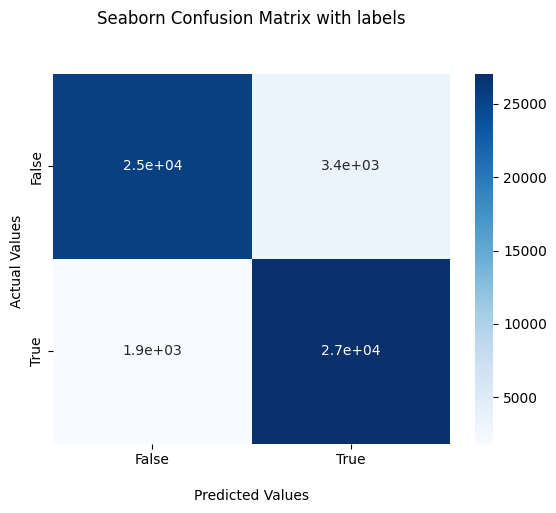

In [ ]:
ax=sns.heatmap(conf_matrix,annot=True,cmap="Blues");
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

# <font color=F06409> <strong> What is F1 score?<br>
<font color=F0CA09>F1 score is a machine learning evaluation metric that measures a model’s accuracy. It combines the precision and recall scores of a model.

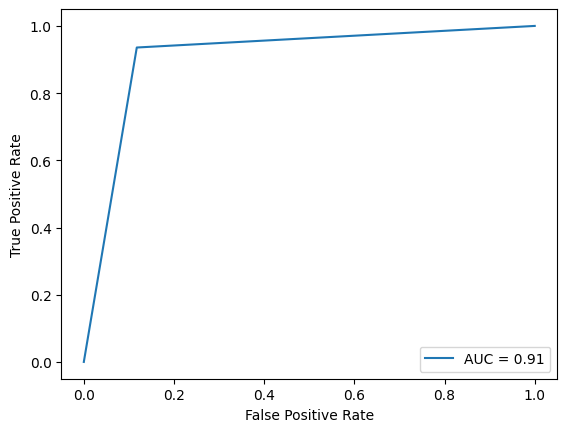

In [ ]:
fpr,tpr,thresh=roc_curve(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()

## Observations
<font color=09F053> <strong> ACCURACY= 0.91 which says that model is able to classify the Two different Classes by 91% time Correctly.

In [ ]:
# # # Saving the trained model
# import pickle

# model_path = "/content/drive/MyDrive/miss_aq/project2/w_IncomeInequality_Prediction.pkl"

# # Save the trained model using pickle
# with open(model_path, 'wb') as f:
#     pickle.dump(final_model, f)
# # xgbm.save_model(model_path)
# print("Model saved successfully at:", model_path)

Model saved successfully at: /content/drive/MyDrive/miss_aq/project2/w_IncomeInequality_Prediction.pkl


In [ ]:
# #  Load the saved model
# with open(model_path, 'rb') as f:
#     saved_model = pickle.load(f)

# y_pred_test = saved_model.predict(X_test_encoded)

In [ ]:
# print("Score:",saved_model.best_score_)

Score: 0.9087939679723818
